In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date).first()

('2010-01-01')

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
lastdate = session.query(measurement.date).order_by(measurement.date.desc()).first()
splitdate = dt.datetime.strptime(lastdate[0], '%Y-%m-%d')
oneyearago = dt.date(splitdate.year -1, splitdate.month, splitdate.day)

# Perform a query to retrieve the data and precipitation scores
sel = [measurement.date, measurement.prcp]
query = session.query(*sel).filter(measurement.date >= oneyearago).all()

In [11]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation = pd.DataFrame(query, columns=['Date','Precipitation'])
precipitation = precipitation.set_index("Date")
precipitation.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [12]:
# Sort the dataframe by date
precipitation = precipitation.sort_values(["Date"], ascending=True)
precipitation.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


In [13]:
#Drop NA values
precipitation = precipitation.dropna(how='any')
precipitation.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70


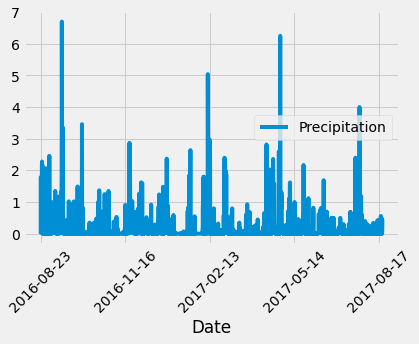

In [14]:
# Use Pandas Plotting with Matplotlib to plot the data
precipitation.plot(rot=45)

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number stations in the dataset
total_station = session.query(station.id).count() 
print(total_station)

9


In [17]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
sel = [measurement.station, func.count(measurement.id)]
active = session.query(*sel).group_by(measurement.station).order_by(func.count(measurement.id).desc()).all()
active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)]
most_active = session.query(*sel).group_by(measurement.station).order_by(func.count(measurement.id).desc()).first()
most_active

(54.0, 85.0, 71.66378066378067)

In [19]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query = session.query(measurement.date, measurement.tobs).filter(measurement.date >= "2016-08-23").\
filter(measurement.date <= "2017-08-23").filter(measurement.station == 'USC00519281').all()

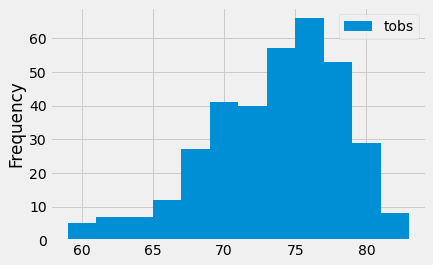

In [20]:
#Plot
df = pd.DataFrame(query)
df.plot.hist(bins=12)

# Close session

In [21]:
# Close Session
# session.close()